In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [4]:
dengue['Year'] = dengue['Year'].astype('int')
dengue['Month'] = dengue['Month'].astype('str')

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [7]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_death = region_df.groupby('Date')['Dengue_Deaths'].sum().reset_index()

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression

monthly_death['Date_Ordinal'] = monthly_death['Date'].map(pd.Timestamp.toordinal)

# # # Reshape for sklearn
X = monthly_death['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_death['Dengue_Deaths'].values   #dependent variable 

# # # Fit model
model = LinearRegression()
model.fit(X, y)

# # # Predict
monthly_death['Predicted_Cases'] = model.predict(X)

# # # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue death.")


The model explains 0.2% of the variation in dengue death.


In [9]:
monthly_death

,Date,Dengue_Deaths,Date_Ordinal,Predicted_Cases
0,2016-01-01,14,735964,10.035293
1,2016-02-01,5,735995,10.064005
2,2016-03-01,9,736024,10.090864
3,2016-04-01,1,736055,10.119576
4,2016-05-01,1,736085,10.147362
5,2016-06-01,4,736116,10.176073
6,2016-07-01,6,736146,10.203859
7,2016-08-01,2,736177,10.232571
8,2016-09-01,28,736208,10.261282
9,2016-10-01,20,736238,10.289068


In [10]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
dengue['Outbreak'] = (dengue['Dengue_Cases'] > 5000).astype(int)

In [12]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Date,Outbreak
0,January,2016,Region I,705,1,2016-01-01,0
840,January,2016,NCR,1261,4,2016-01-01,0
780,January,2016,Region XIII,1116,6,2016-01-01,0
240,January,2016,Region IV-B,203,1,2016-01-01,0
120,January,2016,Region III,1976,3,2016-01-01,0
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,2020-12-01,0
899,December,2020,NCR,658,4,2020-12-01,0
59,December,2020,Region I,1081,1,2020-12-01,0
659,December,2020,Region X,281,1,2020-12-01,0


In [13]:
# Encode categorical features
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

# Combine with numerical features
df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'Outbreak']]], axis=1)

In [14]:
df_encoded

,Region_CAR,Region_NCR,Region_Region I,Region_Region II,Region_Region III,Region_Region IV-A,Region_Region IV-B,Region_Region IX,Region_Region V,Region_Region VI,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
840,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
780,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
240,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
120,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
899,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
59,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
659,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Outbreak', axis=1)
y = df_model['Outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[197   0]
 [  0   7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00         7

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [18]:
def classify_severity(cases):
    if cases < 500:
        return 0
    elif cases <= 5000:
        return 1
    else:
        return 2

dengue['Severity'] = dengue['Dengue_Cases'].apply(classify_severity)

In [19]:
dengue.dtypes

Month                    object
Year                      int64
Region                   object
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
Outbreak                  int64
Severity                  int64
dtype: object

In [20]:
# Encode categorical features
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

# Combine with numerical features
df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'Severity']]], axis=1)
df_model

,Region_CAR,Region_NCR,Region_Region I,Region_Region II,Region_Region III,Region_Region IV-A,Region_Region IV-B,Region_Region IX,Region_Region V,Region_Region VI,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year,Dengue_Cases,Severity
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,705,1
840,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,1261,1
780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,1116,1
240,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,2016,203,0
120,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,1976,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2020,96,0
899,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2020,658,1
59,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2020,1081,1
659,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2020,281,0


In [21]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'multinomial'


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[97  1  0]
 [ 0 99  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      0.99        99
           2       1.00      1.00      1.00         7

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
dengue['Month_num'] = dengue['Month'].map(month_mapping)

In [51]:
X = dengue[['Year', 'Month_num', 'Region']]
y = dengue['Dengue_Cases']

categorical_features = ['Region']
numerical_features = ['Year', 'Month_num']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In [52]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Predict
y_pred = model.predict(X_test_transformed)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 1962316.15
R-squared: 0.23


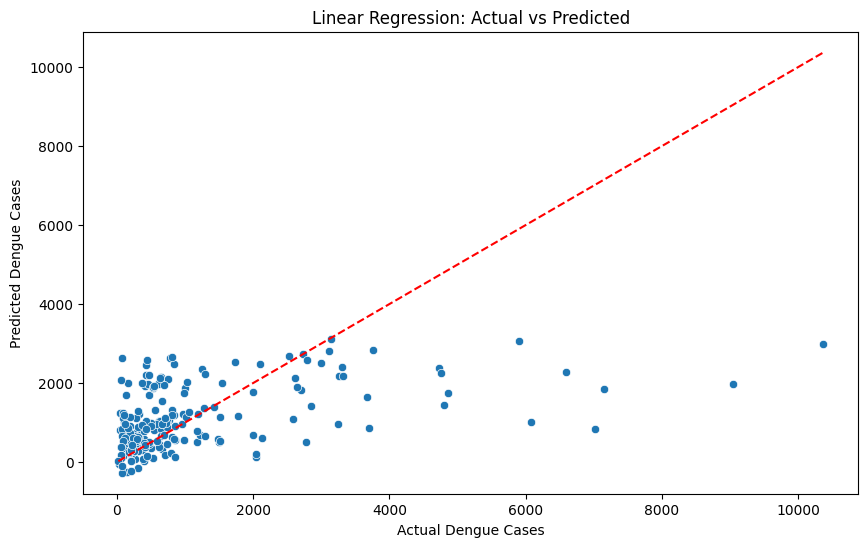

In [47]:
# Actual vs Predicted plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

<h2>Most of the dots stay far below the red line, which means the model predicts much lower numbers than the real dengue cases. The points are spread out, showing the predictions are not very accurate. The model struggles the most when the actual dengue cases are very high.
</h2>

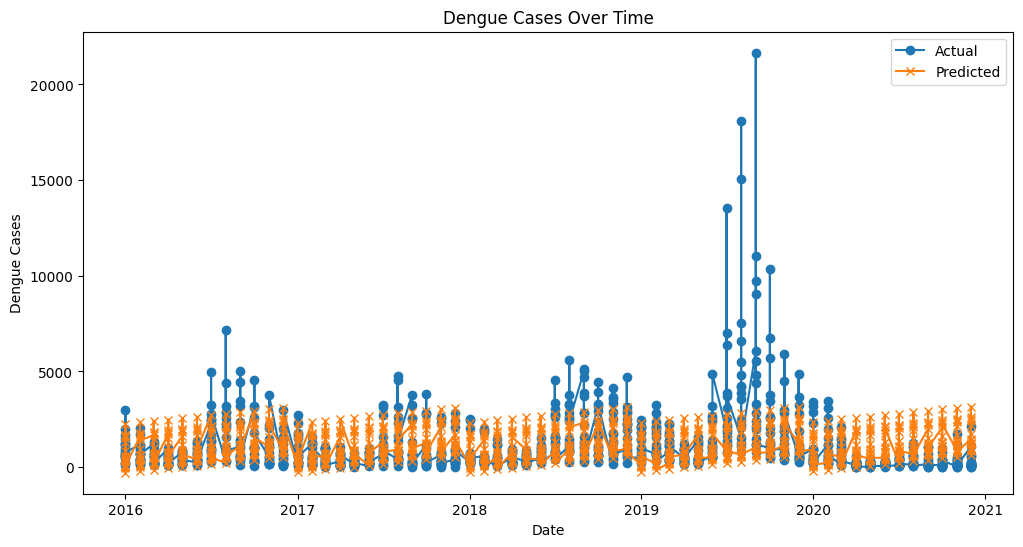

In [45]:
# Dengue cases over time plot
dengue_sorted = dengue.sort_values('Date')
predict_cols = [col for col in ['Year','Month_num','Region'] if col in dengue_sorted.columns]
y_pred_full = model.predict(preprocessor.transform(dengue_sorted[predict_cols]))

plt.figure(figsize=(12,6))
plt.plot(dengue_sorted['Date'], dengue_sorted['Dengue_Cases'], label='Actual', marker='o')
plt.plot(dengue_sorted['Date'], y_pred_full, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases Over Time')
plt.legend()
plt.show()

<h2>The predicted line stays low and smooth, while the real dengue cases jump sharply, especially during outbreaks. This shows the model can’t capture sudden spikes in cases. The predictions follow a simple pattern, but the actual data is much more irregular.</h2>


In [54]:
region4a = dengue[dengue['Region'].str.strip().str.lower() == 'region iv-a'].copy()
yearly_4a = region4a.groupby('Year', as_index=False)['Dengue_Deaths'].sum()

X = yearly_4a[['Year']].values
y = yearly_4a['Dengue_Deaths'].values

In [55]:
lr_model_4a = LinearRegression()
lr_model_4a.fit(X, y)

years_plot = np.arange(yearly_4a['Year'].min(), 2022).reshape(-1, 1)
pred_line = lr_model_4a.predict(years_plot)
pred_2021 = lr_model_4a.predict([[2021]])[0]

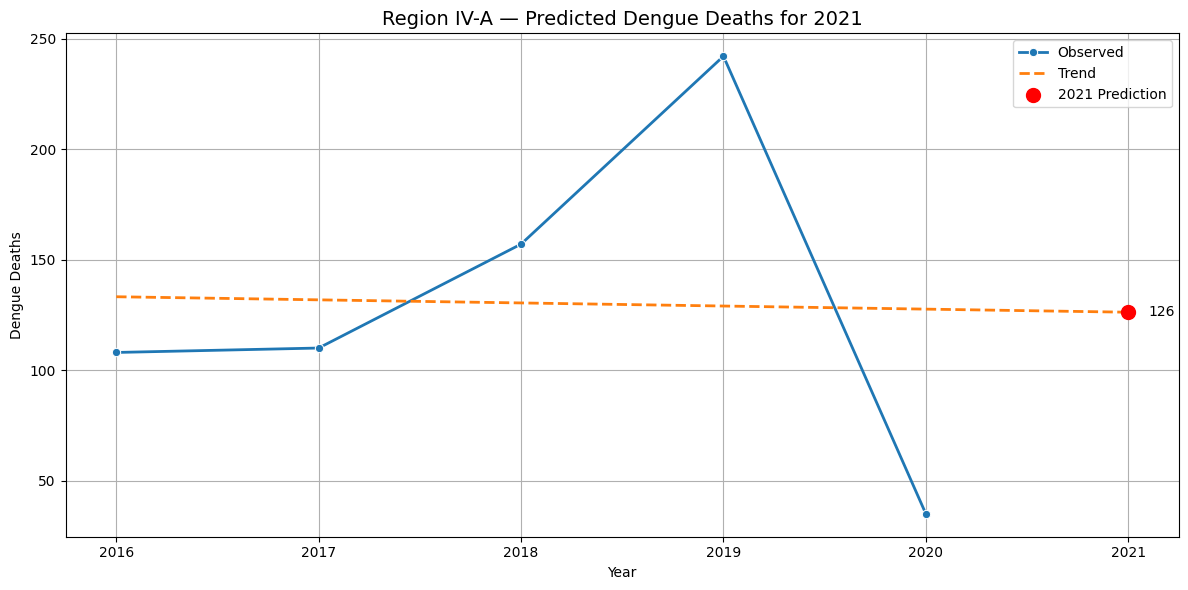

Predicted Dengue Deaths in 2021 – Region IV-A: 126


In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_4a['Year'], y=yearly_4a['Dengue_Deaths'], marker='o', linewidth=2, label='Observed')
plt.plot(years_plot.flatten(), pred_line, linestyle='--', linewidth=2, label='Trend')
plt.scatter(2021, pred_2021, color='red', s=100, zorder=5, label='2021 Prediction')
plt.text(2021 + 0.1, pred_2021, f"{pred_2021:.0f}", va='center')
plt.title("Region IV-A — Predicted Dengue Deaths for 2021", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Predicted Dengue Deaths in 2021 – Region IV-A: {pred_2021:.0f}")

<h2>The real dengue deaths go up and down a lot from year to year, but the prediction stays near the middle. The model smooths out the ups and downs and gives a steady estimate instead of following the big spike in 2019 or the drop in 2020. The 2021 prediction lands close to the long-term average rather than the sudden changes seen in the real data.
</h2>

In [62]:
ncr = dengue[dengue['Region'].str.strip().str.lower() == 'ncr'].copy()
yearly_ncr = ncr.groupby('Year', as_index=False)['Dengue_Cases'].sum()

X = yearly_ncr[['Year']].values
y = yearly_ncr['Dengue_Cases'].values

lr_model_ncr = LinearRegression()
lr_model_ncr.fit(X, y)

years_plot = np.arange(yearly_ncr['Year'].min(), 2022).reshape(-1, 1)
pred_line = lr_model_ncr.predict(years_plot)
pred_2021 = lr_model_ncr.predict([[2021]])[0]

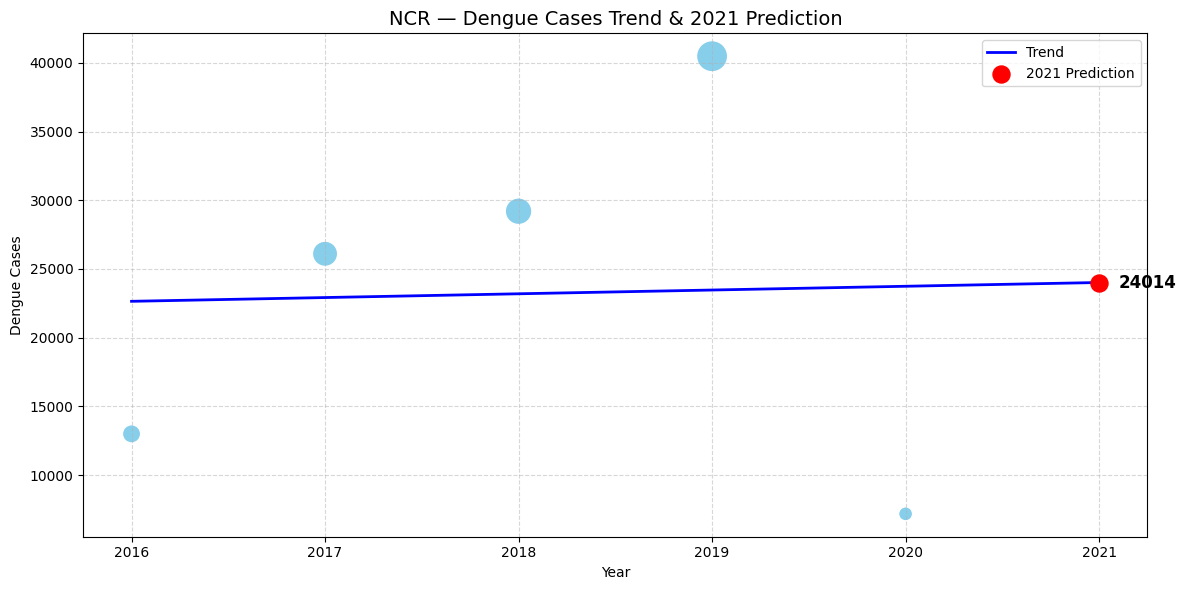

Predicted Dengue Cases in 2021 – NCR: 24014


In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Year', y='Dengue_Cases', size='Dengue_Cases',
                sizes=(100, 500), data=yearly_ncr, color='skyblue', legend=False)

plt.plot(years_plot.flatten(), pred_line, color='blue', linestyle='-', linewidth=2, label='Trend')
plt.scatter(2021, pred_2021, color='red', s=150, zorder=5, label='2021 Prediction')
plt.text(2021 + 0.1, pred_2021, f"{int(pred_2021)}", va='center', fontsize=12, fontweight='bold')

plt.title("NCR — Dengue Cases Trend & 2021 Prediction", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Predicted Dengue Cases in 2021 – NCR: {int(pred_2021)}")


## The chart shows dengue cases in NCR from 2016 to 2020. It predicts 24,014 cases for 2021. The number of cases rises and falls each year.